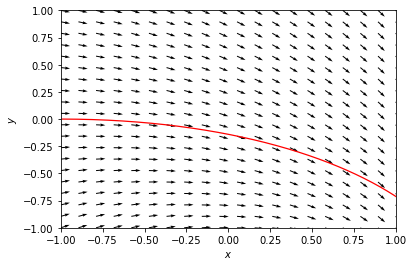

In [3]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (x[0]+x[1]+1)/(x[0]-x[1]-3)   ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-1,0]]
color=['r','b']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-1,1,20),np.linspace(-1,1,20) )

V = (X+Y+1)/(X-Y-3)  ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


##Limits of the graph
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [4]:
## k levels?
levels_solution = []
x,y=-1,0
K1= np.log(np.abs(x - 1)) + (np.log(np.abs(1+(((y+2)/(x-1))**2)))/2) - np.arctan((y+2)/(x-1)) 
print('k1 value is',K1) 
levels_solution.append(K1)

k1 value is 1.8251189342373662


In [5]:
## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels) ## Ordenado para plotear las contour curves

[1.8251189342373662]
[1.8251189342373662]


C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':


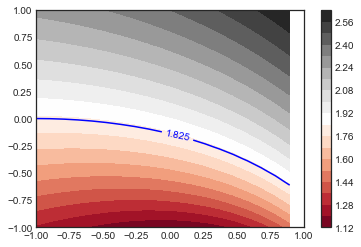

In [7]:
%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(-1, 1, 20)
ys = np.linspace(-1, 1, 20)

def fs(xs, ys):  ## y_exact equation without constant
    
    return np.log(np.abs(xs - 1)) + (np.log(np.abs(1+(((ys+2)/(xs-1))**2)))/2) - np.arctan((ys+2)/(xs-1)) 

X, Y = np.meshgrid(xs, ys)
Z = fs(X,Y)

contours = plt.contour(X, Y, Z, levels, colors='blue') ## Our solution
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy') ## General contour curve
plt.colorbar()